Source codes for Python Machine Learning By Example 4th Edition (Packt Publishing)

Chapter 14 Building an Image Search Engine Using Multimodal Models

Author: Yuxi (Hayden) Liu (yuxi.liu.ece@gmail.com)

# Finding images with words 

## Image search using the pre-trained CLIP model

In [1]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('clip-ViT-B-32')

/home/oreo/anaconda3/envs/pyml_gpu/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import glob
from PIL import Image
import torch

In [3]:
image_paths = list(glob.glob('flickr8k/Flicker8k_Dataset/*.jpg'))

all_image_embeddings = []
for img_path in image_paths:
    img = Image.open(img_path)
    all_image_embeddings.append(model.encode(img, convert_to_tensor=True))
 

In [4]:
import matplotlib.pyplot as plt
 

def search_top_images(model, image_embeddings, query, top_k=1):
    query_embeddings = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    hits = util.semantic_search(query_embeddings,  image_embeddings, top_k=top_k)[0]
    return hits


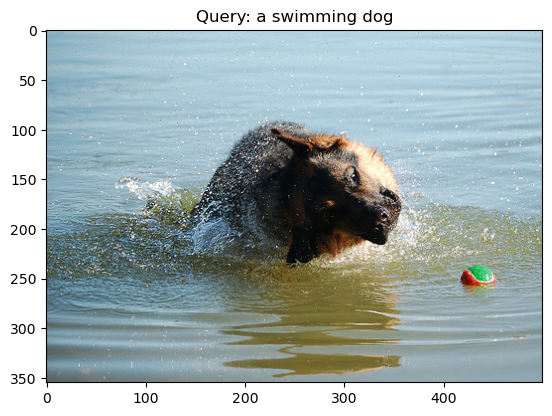

In [5]:
query = "a swimming dog"
hits = search_top_images(model, all_image_embeddings, query)

for hit in hits:
    img_path = image_paths[hit['corpus_id']]
    image = Image.open(img_path)
    plt.imshow(image)
    plt.title(f"Query: {query}")
    plt.show()

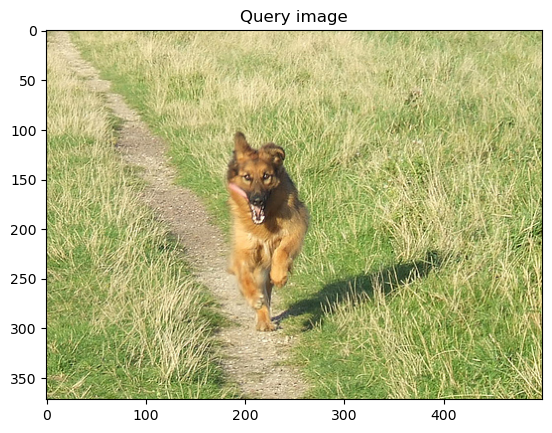

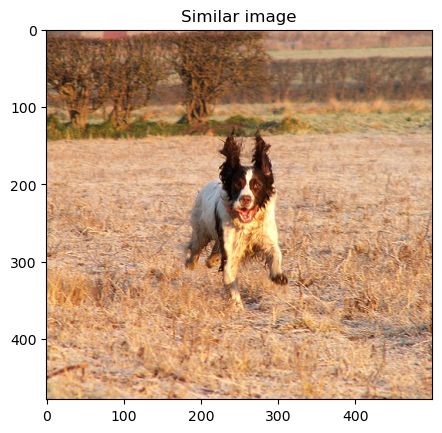

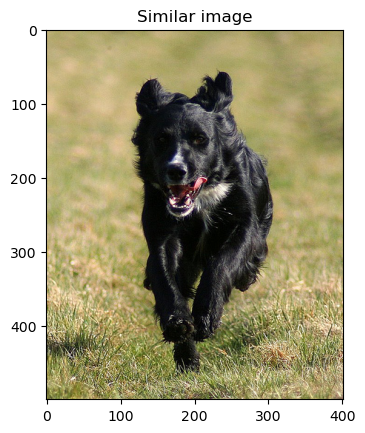

In [6]:
image_query = Image.open("flickr8k/Flicker8k_Dataset/240696675_7d05193aa0.jpg")
hits = search_top_images(model, all_image_embeddings, image_query, 3)[1:]

plt.imshow(image_query)
plt.title(f"Query image")
plt.show()

for hit in hits:
    img_path = image_paths[hit['corpus_id']]
    image = Image.open(img_path)
    plt.imshow(image)
    plt.title(f"Similar image")
    plt.show()


## Zero-shot classification

In [7]:
from torchvision.datasets import CIFAR100
cifar100 = CIFAR100(root="CIFAR100", download=True, train=False)

/home/oreo/anaconda3/envs/pyml_gpu/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/oreo/anaconda3/envs/pyml_gpu/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Files already downloaded and verified


In [8]:
print(cifar100.classes)
print("Number of classes in CIFAR100 dataset:", len(cifar100.classes))

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [9]:
sample_index = 0
img, class_id = cifar100[sample_index]
print(f"Class of the sample image: {class_id} - {cifar100.classes[class_id]}")

Class of the sample image: 49 - mountain


In [10]:
sample_image_embeddings = model.encode(img, convert_to_tensor=True)

In [11]:
class_text = model.encode(cifar100.classes, convert_to_tensor=True)

In [12]:
hits = util.semantic_search(sample_image_embeddings,  class_text, top_k=1)[0]
pred = hits[0]['corpus_id']
print(f"Predicted class of the sample image: {pred}")

Predicted class of the sample image: 49


In [13]:
all_image_embeddings = []
class_true = []
for img, class_id in cifar100:
    class_true.append(class_id)
    all_image_embeddings.append(model.encode(img, convert_to_tensor=True))

In [14]:
class_pred = []
for hit in util.semantic_search(all_image_embeddings,  class_text, top_k=1):
    class_pred.append(hit[0]['corpus_id'])

In [15]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(class_true, class_pred)
print(f"Accuracy of zero-shot classification: {acc * 100}%")

Accuracy of zero-shot classification: 55.15%


---

Readers may ignore the next cell.

In [16]:
!jupyter nbconvert --to python ch14_part2.ipynb --TemplateExporter.exclude_input_prompt=True

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[NbConvertApp] Converting notebook ch14_part2.ipynb to python
[NbConvertApp] Writing 2979 bytes to ch14_part2.py
